In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### Read the `heart.csv` data from the `Resources` folder into a Pandas DataFrame.

In [9]:
# Reading in the heart.csv file
file_path = r'/Users/sandrabotica/Desktop/ML_Project_4/Resources/heart.csv'
# data = Path('Resources/heart.csv')
heart_df = pd.read_csv(file_path)
heart_df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### Data exploration

In [10]:
# Checking datatypes, row number, column number and if any null values
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Checking value_counts for age column 
heart_df["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [12]:
# Checking value_counts for sex column 
heart_df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [475]:
# Checking value_counts for cp column 
heart_df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [476]:
# Checking value_counts for trtbps column 
heart_df["trtbps"].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trtbps, dtype: int64

In [477]:
# Checking value_counts for chol column 
heart_df["chol"].value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

In [478]:
# Checking value_counts for fbs column 
heart_df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [479]:
# Checking value_counts for restecg column 
heart_df["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [480]:
# Checking value_counts for thalachh column 
heart_df["thalachh"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalachh, Length: 91, dtype: int64

In [481]:
# Checking value_counts for exng column 
heart_df["exng"].value_counts()

0    204
1     99
Name: exng, dtype: int64

In [482]:
# Checking value_counts for oldpeak column 
heart_df["oldpeak"].value_counts()

0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64

In [483]:
# Checking value_counts for slp column 
heart_df["slp"].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

In [484]:
# Checking value_counts for caa column 
heart_df["caa"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [485]:
# Checking value_counts for thall column 
heart_df["thall"].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [486]:
# Checking value_counts for output column 
heart_df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

In [487]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## Creating the labels set (`y`)  from the “output” column, and the features (`X`) DataFrame from the remaining columns.

In [488]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = heart_df["output"]

# Separate the X variable, the features
X = heart_df.drop(columns="output")

In [489]:
# Review the X variable DataFrame
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [490]:
# Check the balance of the labels values/target variable(y)
y.value_counts()

1    165
0    138
Name: output, dtype: int64

## Split the Data into Training and Testing Sets

In [491]:
# Split into testing and training sets using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify =1)

X_train.shape

## Creating a Logistic Regression Model with the original data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [492]:
# Declare a logistic regression model.
# Apply a random_state of 1 to the model
classifier = LogisticRegression(solver='lbfgs',random_state=1)

# Fit and save the logistic regression model using the training data
classifier.fit(X_train, y_train)

/Users/sandrabotica/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [493]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8722466960352423
Testing Data Score: 0.7894736842105263


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [494]:
# Make a prediction using the testing data
testing_predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": testing_predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [495]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, testing_predictions)

0.7818815331010454

In [496]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[24 11]
 [ 5 36]]


In [497]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (< 50% diameter narrowing. less chance of heart disease) and `1` (> 50% diameter narrowing. more chance of heart disease) labels?

**Answer:** The logistic regression model was better at predicting the `1` label then the `0` labels. This may be due to the bias of data having 41 `1`s and only 35 `0`s. 

A balanced_accuracy_score of 78% makes one think that this is a good prediction model, as does the 79% accuracy score in the classification report.

Based on the confusion matrix.
 - Total predictions = 76
 - Correct predictions = 60 (24 `0`s TN, 36 `1`s TP)
 - Incorrect predictions = 16 (11 `0`s FP, 5 `1`s at FN)

Based on the classification report.
 - Precision: 23% of the time (0.77 precision score) the model predicted a false positive (predicted a `1` but was actually a `0`), hence 11 people (from the confusion matrix) were identified as more chance of heart disease when they were less chance of heart disease, predicting a FALSE ALARM (Type 1 error).
 - Recall: 12% of the time (0.88 recall score) the model predicted a false negative (predicted a `0` but was actually a `1`), hence 5 people (from the confusion matrix) who had more chance of heart disease have been MISSED in the prediction (Type 2 error).

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [498]:
# # Import the RandomOverSampler module form imbalanced-learn
# from imblearn.over_sampling import RandomOverSampler

# # Instantiate the random oversampler model
# # # Assign a random_state parameter of 1 to the model
# ros_model = RandomOverSampler(random_state=1)

# # Fit the original training data to the random_oversampler model
# X_res, y_res = ros_model.fit_resample(X_train, y_train)

In [499]:
# # Count the distinct values of the resampled labels data
# X_res.shape

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [500]:
# # Instantiate the Logistic Regression model
# # Assign a random_state parameter of 1 to the model
# classifier_rs = LogisticRegression(solver='lbfgs', random_state=1)
# classifier_rs

# # Fit the model using the resampled training data
# classifier_rs.fit(X_res, y_res)

# # Make a prediction using the testing data
# testing_predictions_rs = classifier.predict(X_test)
# results_rs = pd.DataFrame({"Prediction": testing_predictions_rs, "Actual": y_test}).reset_index(drop=True)
# results_rs.head(10)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [501]:
# # Print the balanced_accuracy score of the model 
# balanced_accuracy_score(y_test, testing_predictions_rs)

In [502]:
# # Generate a confusion matrix for the model
# confusion_matrix(y_test, testing_predictions_rs)

In [503]:
# # Print the classification report for the model
# print(classification_report(y_test, testing_predictions_rs))

### Step 4: Answer the following question

**Question:** How well does the logistic regression model predict both the `0` (< 50% diameter narrowing. less chance of heart disease) and `1` (> 50% diameter narrowing. more chance of heart disease) labels?

**Answer:** 

#### Considering the features "age", "trtbps", "chol" and "thalachh" were much larger values to the other features the following is an exploration of how predictions would be different if I use the StandardScaler module and fit_transform function to scale all columns (except for output)

In [504]:
# heart_df_scaled = heart_df.drop(columns="output")

In [505]:
# # Use the StandardScaler module from scikit-learn to normalize the data from the CSV file
# # fit_transform function to scale all columns 
# heart_df_scaled = StandardScaler().fit_transform(heart_df_scaled)

# # Diplay the first row of the scaled data
# heart_df_scaled[0:1]

In [506]:
# # Create a DataFrame with the scaled data, excluding the target variable column "output"
# heart_df_scaled = pd.DataFrame(heart_df_scaled, columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
#        'exng', 'oldpeak', 'slp', 'caa', 'thall'])

# # Display sample data
# heart_df_scaled.head()

In [507]:
# # Separate the data into labels and features

# # Separate the y variable, the labels
# y = heart_df["output"]

# # Separate the X variable, the features
# X = heart_df_scaled

In [508]:
# # Split the data using train_test_split
# # Assign a random_state of 1 to the function
# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     random_state=1)
# X_train.shape

In [509]:
# # Declare a logistic regression model.
# # Apply a random_state of 1 to the model
# classifier = LogisticRegression(solver='lbfgs',random_state=1)

# # Fit and save the logistic regression model using the training data
# classifier.fit(X_train, y_train)

In [510]:
# # Score the model
# print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [511]:
# # Make a prediction using the testing data
# testing_predictions = classifier.predict(X_test)
# results = pd.DataFrame({"Prediction": testing_predictions, "Actual": y_test}).reset_index(drop=True)
# results.head(10)

In [512]:
# # Print the balanced_accuracy score of the model
# balanced_accuracy_score(y_test, testing_predictions)

In [513]:
# # Create and save the confusion matrix for the testing data
# test_matrix = confusion_matrix(y_test, testing_predictions)

# # Print the confusion matrix for the testing data
# print(test_matrix)

In [514]:
# # Create and save the testing classification report
# testing_report = classification_report(y_test, testing_predictions)

# # Print the testing classification report
# print(testing_report)

## Random classifier

In [518]:
from sklearn.ensemble import RandomForestClassifier

In [519]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [520]:
# Fitting the model
# rf_model = rf_model.fit(X_train_scaled, y_train)
rf_model = rf_model.fit(X_train, y_train)

In [521]:
# Making predictions using the testing data
# predictions = rf_model.predict(X_test_scaled)
predictions = rf_model.predict(X_test)

In [522]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [523]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,24,11
Actual 1,9,32


Accuracy Score : 0.7368421052631579
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        35
           1       0.74      0.78      0.76        41

    accuracy                           0.74        76
   macro avg       0.74      0.73      0.73        76
weighted avg       0.74      0.74      0.74        76



In [524]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.16831897144577646, 'cp'),
 (0.12334776239933179, 'thalachh'),
 (0.11838363983592903, 'oldpeak'),
 (0.10281251079860496, 'caa'),
 (0.08272978144074945, 'age'),
 (0.08115413360987835, 'exng'),
 (0.07492859724660296, 'thall'),
 (0.07360264874940722, 'chol'),
 (0.07086670155528846, 'trtbps'),
 (0.043607620700329475, 'slp'),
 (0.033655508064122, 'sex'),
 (0.016973810529728156, 'restecg'),
 (0.009618313624251737, 'fbs')]

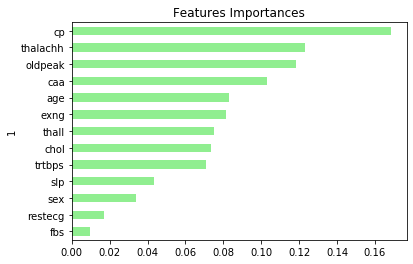

In [525]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)